## Artist Recognition Project by Mohamed Alaa Gaida and Nadine Fakhet

the project goal is to identify artist for a given painting among 18 popular artists

In [88]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

## Data preparation and cleaning

our data was downloaded from wikiart using the wikiart API using this code "https://github.com/lucasdavid/wikiart"
we only downloaded data for those artists :

-Camille Pissarro <br>
-Childe Hassam<br>
-Claude Monet<br>
-Edgar Degas<br>
-Eugene Boudin<br>
-Henri Matisse<br>
-Ilya Repin<br>
-Ivan Aivazovsky<br>
-John Singer Sargent<br>
-Martiros Sarian<br>
-Nicholas Roerich<br>
-Pablo Ppicasso<br>
-Paul Cezanne<br>
-Pierre-Auguste Renoir<br>
-Pyotr Konchalovsky<br>
-Rembrandt<br>
-Salvador Dali<br>
-Vincent van Gogh<br>

### cleaning the data (resizing the images and moving them)

In [90]:
from os import listdir
from os.path import isfile, join
import os
import shutil
import PIL
from PIL import Image

dirs = "images/"
basewidth = 256
alldirs = [dirs + f + '/' for f in listdir(dirs)]
for d in alldirs :
    tmp = [d + s + "/" for s in listdir(d) if os.path.isdir(d + s + "/")]
    for x in tmp :
        for y in listdir(x) :
            try :#resize code
                img = Image.open(x+y)
                wpercent = (basewidth / float(img.size[0]))
                hsize = int((float(img.size[1]) * float(wpercent)))
                img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
                img.save(x+y)
                #resize code end
                shutil.move(x+y, d)
            except IOError :
                print(ValueError)
                os.remove(x+y)
        shutil.rmtree(x)

# The model

In [92]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 18, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [93]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_2 (Dense)              (None, 18)                2322      
Total para

In [94]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8198 images belonging to 18 classes.
Found 899 images belonging to 18 classes.


In [5]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8198/32,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 899/32)

Epoch 1/20
257/256 [==============================] - 175s 680ms/step - loss: 2.5845 - acc: 0.2047 - val_loss: 2.3499 - val_acc: 0.2836
Epoch 2/20
257/256 [==============================] - 71s 275ms/step - loss: 2.1204 - acc: 0.3517 - val_loss: 2.1295 - val_acc: 0.3448
Epoch 3/20
257/256 [==============================] - 72s 278ms/step - loss: 1.9444 - acc: 0.3995 - val_loss: 2.3059 - val_acc: 0.3226
Epoch 4/20
257/256 [==============================] - 70s 271ms/step - loss: 1.8051 - acc: 0.4396 - val_loss: 1.9139 - val_acc: 0.4205
Epoch 5/20
257/256 [==============================] - 70s 274ms/step - loss: 1.7242 - acc: 0.4667 - val_loss: 2.1184 - val_acc: 0.3615
Epoch 6/20
257/256 [==============================] - 73s 284ms/step - loss: 1.6482 - acc: 0.4820 - val_loss: 2.0185 - val_acc: 0.3982
Epoch 7/20
257/256 [==============================] - 70s 271ms/step - loss: 1.5597 - acc: 0.5111 - val_loss: 1.9058 - val_acc: 0.4238
Epoch 8/20
257/256 [==============================] - 

In [6]:
classifier.save_weights("weightprojectpaint.h5")

In [95]:
classifier.load_weights("weightprojectpaint.h5")

## Model 2
changing the batch size to 64

In [98]:
classifier2 = Sequential()

classifier2.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

classifier2.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

classifier2.add(Flatten())

classifier2.add(Dense(units = 128, activation = 'relu'))
classifier2.add(Dense(units = 18, activation = 'softmax'))

classifier2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [99]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train/',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/test/',
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 8198 images belonging to 18 classes.
Found 899 images belonging to 18 classes.


In [100]:
classifier2.fit_generator(training_set,
                         steps_per_epoch = 8198/64,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 899/64)

Epoch 1/20
129/128 [==============================] - 165s 1s/step - loss: 2.5346 - acc: 0.2075 - val_loss: 2.5793 - val_acc: 0.2069
Epoch 2/20
129/128 [==============================] - 63s 492ms/step - loss: 2.1640 - acc: 0.3369 - val_loss: 2.1149 - val_acc: 0.3593
Epoch 3/20
129/128 [==============================] - 59s 459ms/step - loss: 2.0040 - acc: 0.3811 - val_loss: 2.4322 - val_acc: 0.3003
Epoch 4/20
129/128 [==============================] - 59s 460ms/step - loss: 1.9045 - acc: 0.4149 - val_loss: 2.0192 - val_acc: 0.3915
Epoch 5/20
129/128 [==============================] - 60s 468ms/step - loss: 1.7942 - acc: 0.4465 - val_loss: 2.1460 - val_acc: 0.3504
Epoch 6/20
129/128 [==============================] - 60s 466ms/step - loss: 1.7120 - acc: 0.4713 - val_loss: 1.8983 - val_acc: 0.4238
Epoch 7/20
129/128 [==============================] - 60s 469ms/step - loss: 1.6459 - acc: 0.4844 - val_loss: 2.0375 - val_acc: 0.4016
Epoch 8/20
129/128 [==============================] - 64s

In [102]:
classifier2.save_weights("weightprojectpaint2.h5")

In [ ]:
classifier2.load_weights("weightprojectpaint2.h5")

## Model 3
changing the optimizer RMS prop

In [41]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8198 images belonging to 18 classes.
Found 899 images belonging to 18 classes.


In [38]:
from keras import optimizers

classifier3 = Sequential()

classifier3.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

classifier3.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

classifier3.add(Flatten())

classifier3.add(Dense(units = 128, activation = 'relu'))
classifier3.add(Dense(units = 18, activation = 'softmax'))

opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0)

classifier3.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
classifier3.fit_generator(training_set,
                         steps_per_epoch = 8198/32,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 899/32)

Epoch 1/20
257/256 [==============================] - 63s 244ms/step - loss: 2.5400 - acc: 0.2212 - val_loss: 2.1464 - val_acc: 0.3548
Epoch 2/20
257/256 [==============================] - 64s 250ms/step - loss: 2.1396 - acc: 0.3415 - val_loss: 2.5303 - val_acc: 0.3048
Epoch 3/20
257/256 [==============================] - 62s 239ms/step - loss: 1.9643 - acc: 0.3879 - val_loss: 1.9285 - val_acc: 0.4349
Epoch 4/20
257/256 [==============================] - 60s 235ms/step - loss: 1.8363 - acc: 0.4329 - val_loss: 2.2247 - val_acc: 0.3693
Epoch 5/20
257/256 [==============================] - 60s 234ms/step - loss: 1.7552 - acc: 0.4529 - val_loss: 2.2927 - val_acc: 0.3660
Epoch 6/20
257/256 [==============================] - 59s 229ms/step - loss: 1.6621 - acc: 0.4863 - val_loss: 2.1812 - val_acc: 0.3760
Epoch 7/20
257/256 [==============================] - 60s 232ms/step - loss: 1.5964 - acc: 0.5017 - val_loss: 1.9010 - val_acc: 0.4316
Epoch 8/20
257/256 [==============================] - 6

In [29]:
classifier3.save_weights("weightprojectpaint3.h5")

## Model 4
using SGD optimizer

In [25]:
from keras import optimizers

# Initialising the CNN
classifier4 = Sequential()
# Step 1 - Convolution
classifier4.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
# Step 2 - Pooling
classifier4.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier4.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier4.add(Flatten())
# Step 4 - Full connection
classifier4.add(Dense(units = 128, activation = 'relu'))
classifier4.add(Dense(units = 18, activation = 'softmax'))
# Compiling the CNN
classifier4.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
                    loss='categorical_crossentropy', metrics = ['accuracy'])

In [28]:
classifier4.save_weights("weightprojectpaint4.h5")

In [26]:
classifier4.load_weights("weightprojectpaint4.h5")

In [27]:
classifier4.fit_generator(training_set,
                         steps_per_epoch = 8198/32,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 899/32)

Epoch 1/10
257/256 [==============================] - 67s 262ms/step - loss: 1.3254 - acc: 0.5917 - val_loss: 1.9573 - val_acc: 0.4249
Epoch 2/10
257/256 [==============================] - 67s 263ms/step - loss: 1.3030 - acc: 0.5983 - val_loss: 1.9239 - val_acc: 0.4249
Epoch 3/10
257/256 [==============================] - 63s 245ms/step - loss: 1.3192 - acc: 0.5918 - val_loss: 1.9698 - val_acc: 0.4227
Epoch 4/10
257/256 [==============================] - 61s 239ms/step - loss: 1.3103 - acc: 0.5958 - val_loss: 1.8429 - val_acc: 0.4516
Epoch 5/10
257/256 [==============================] - 60s 234ms/step - loss: 1.3114 - acc: 0.5895 - val_loss: 1.9498 - val_acc: 0.4327
Epoch 6/10
257/256 [==============================] - 60s 235ms/step - loss: 1.3188 - acc: 0.5891 - val_loss: 2.0061 - val_acc: 0.4260
Epoch 7/10
257/256 [==============================] - 57s 224ms/step - loss: 1.2998 - acc: 0.6040 - val_loss: 1.9229 - val_acc: 0.4205
Epoch 8/10
257/256 [==============================] - 6

# Testing the model

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(321, 256, 3)


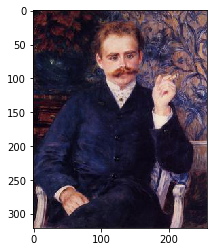

In [44]:
%matplotlib inline
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np

img_path = "/home/g3ida/Desktop/data/other/pierre-auguste-renoir/218190.jpg"
img = image.load_img(img_path)
print(type(img))

x = image.img_to_array(img)
x = np.array(x) / 255.

plt.imshow(x)

In [45]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(img_path, target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image / 255.
result = classifier3.predict(test_image)
print(training_set.class_indices)
print(result)


{'camille-pissarro': 0, 'childe-hassam': 1, 'claude-monet': 2, 'edgar-degas': 3, 'eugene-boudin': 4, 'henri-matisse': 5, 'ilya-repin': 6, 'ivan-aivazovsky': 7, 'john-singer-sargent': 8, 'martiros-sarian': 9, 'nicholas-roerich': 10, 'pablo-picasso': 11, 'paul-cezanne': 12, 'pierre-auguste-renoir': 13, 'pyotr-konchalovsky': 14, 'rembrandt': 15, 'salvador-dali': 16, 'vincent-van-gogh': 17}
[[2.8633025e-07 2.8599297e-07 2.6988400e-09 2.8435250e-03 2.0317429e-17
  4.9964246e-08 8.6730272e-03 1.7004186e-15 1.8205434e-03 2.2687217e-10
  4.7800050e-08 2.6023469e-07 2.4913595e-04 9.8634422e-01 1.6556381e-08
  6.8393507e-05 1.1570785e-09 2.1548962e-07]]


In [46]:
print(np.argmax(result[0]))

13


In [47]:
def sortSecond(val): 
    return val[1]

l = [(key, result[0][val]*100) for key, val in training_set.class_indices.items()]
l.sort(key = sortSecond, reverse = True)

l
for (a,b) in l:
    print("{0:.2f}".format(b), a)

98.63 pierre-auguste-renoir
0.87 ilya-repin
0.28 edgar-degas
0.18 john-singer-sargent
0.02 paul-cezanne
0.01 rembrandt
0.00 camille-pissarro
0.00 childe-hassam
0.00 pablo-picasso
0.00 vincent-van-gogh
0.00 henri-matisse
0.00 nicholas-roerich
0.00 pyotr-konchalovsky
0.00 claude-monet
0.00 salvador-dali
0.00 martiros-sarian
0.00 ivan-aivazovsky
0.00 eugene-boudin
